### Step 1: Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from time import sleep
import yfinance as yf

In [2]:
data = pd.read_csv('data.csv', index_col=0)


In [3]:
data.columns

Index(['RUT', 'SP400', 'OVV', 'AR', 'CHK', 'SWN', 'RRC', 'BJ', 'CAR', 'PDCE',
       'LSCC', 'WSC', 'PFGC', 'TTEK', 'HR', 'IWN', 'VTWO', 'URTY', 'VTWV',
       'TNA', 'TZA', 'RWM', 'SRTY', 'TWM', 'AEO', 'DPZ', 'FNF', 'FL', 'GT',
       'IBKR', 'MAT', 'NYT', 'SEDG', 'STLD', 'TRIP', 'WH', 'YELP', 'XMMO',
       'XMHQ', 'IJH', 'MDY', 'IVOO', 'SPMD', 'SPY'],
      dtype='object')

In [4]:
rut_df = yf.download('^RUT', start = '2021-02-10', end = '2023-01-18', progress = False)[['Close']].rename(columns = {'Close': 'close'})
sp400_df = yf.download('^SP400', start = '2021-02-10', end = '2023-01-18', progress = False)[['Close']].rename(columns = {'Close': 'close'}) 

In [5]:
rut_df

,close
Date,
2021-02-10,2282.439941
2021-02-11,2285.320068
2021-02-12,2289.360107
2021-02-16,2272.889893
2021-02-17,2256.110107
...,...
2023-01-10,1822.650024
2023-01-11,1844.050049
2023-01-12,1876.060059


In [6]:
sp400_df

,close
Date,
2021-02-10,2519.239990
2021-02-11,2535.250000
2021-02-12,2544.550049
2021-02-16,2539.229980
2021-02-17,2525.610107
...,...
2023-01-10,2514.520020
2023-01-11,2545.360107
2023-01-12,2568.370117


In [7]:
data['RUT_1'] = data['RUT'].shift()
data['RUT_2'] = data['RUT_1'].shift()
data['SP400_1'] = data['SP400'].shift()
data['SP400_2'] = data['SP400_1'].shift()

In [8]:
data

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,XMHQ,IJH,MDY,IVOO,SPMD,SPY,RUT_1,RUT_2,SP400_1,SP400_2
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-10,2282.439941,2519.239990,20.090000,8.400000,44.990002,4.38,10.190000,43.689999,43.270000,28.090000,...,73.769997,251.520004,459.359985,170.050003,44.189999,390.079987,NaN,NaN,NaN,NaN
2021-02-11,2285.320068,2535.250000,20.549999,8.110000,42.799999,4.17,9.570000,42.860001,42.750000,27.820000,...,74.370003,253.089996,462.190002,171.119995,44.459999,390.709991,2282.439941,NaN,2519.239990,NaN
2021-02-12,2289.360107,2544.550049,21.690001,9.000000,42.509998,4.34,10.160000,43.000000,44.709999,28.600000,...,74.639999,253.850006,463.579987,171.740005,44.630001,392.640015,2285.320068,2282.439941,2535.250000,2519.239990
2021-02-16,2272.889893,2539.229980,22.700001,9.490000,43.549999,4.51,10.940000,43.459999,45.700001,29.250000,...,74.620003,253.389999,462.790009,171.350006,44.560001,392.299988,2289.360107,2285.320068,2544.550049,2535.250000
2021-02-17,2256.110107,2525.610107,22.930000,9.780000,44.259998,4.60,11.470000,43.810001,42.820000,29.190001,...,74.269997,252.130005,460.279999,170.520004,44.330002,392.390015,2272.889893,2289.360107,2539.229980,2544.550049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,1822.650024,2514.520020,49.000000,29.000000,88.370003,5.68,24.420000,67.050003,171.669998,62.889999,...,71.489998,250.440002,458.440002,169.479996,44.020000,390.579987,1795.910034,1792.800049,2490.500000,2489.949951
2023-01-11,1844.050049,2545.360107,49.020000,28.760000,89.570000,5.74,24.629999,69.709999,182.000000,63.400002,...,72.320000,253.500000,464.119995,171.550003,44.570000,395.519989,1822.650024,1795.910034,2514.520020,2490.500000
2023-01-12,1876.060059,2568.370117,50.869999,29.950001,91.489998,6.00,25.610001,69.349998,189.339996,66.150002,...,72.849998,255.880005,468.359985,173.000000,44.970001,396.959991,1844.050049,1822.650024,2545.360107,2514.520020


In [9]:
def get_rsi(close, lookback):
    ret = close.diff()
    up = []
    down = []
    for i in range(len(ret)):
        if ret[i] < 0:
            up.append(0)
            down.append(ret[i])
        else:
            up.append(ret[i])
            down.append(0)
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    return rsi_df[3:]

data['rsi_14_rut'] = get_rsi(rut_df['close'], 14)
data['rsi_14_sp400'] = get_rsi(sp400_df['close'], 14)
data = data.dropna()
data

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,MDY,IVOO,SPMD,SPY,RUT_1,RUT_2,SP400_1,SP400_2,rsi_14_rut,rsi_14_sp400
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-17,2256.110107,2525.610107,22.930000,9.780000,44.259998,4.60,11.470000,43.810001,42.820000,29.190001,...,460.279999,170.520004,44.330002,392.390015,2272.889893,2289.360107,2539.229980,2544.550049,52.722412,90.991984
2021-02-18,2218.389893,2496.649902,20.950001,8.960000,43.000000,4.22,10.350000,44.770000,44.049999,28.000000,...,455.350006,168.669998,43.810001,390.720001,2256.110107,2272.889893,2525.610107,2539.229980,32.976659,79.029335
2021-02-19,2266.689941,2535.389893,21.360001,8.960000,44.000000,4.27,10.170000,44.660000,48.750000,28.690001,...,461.890015,171.179993,44.470001,390.029999,2218.389893,2256.110107,2496.649902,2525.610107,55.802758,82.368618
2021-02-22,2251.070068,2527.020020,22.620001,8.760000,43.840000,4.22,10.300000,43.130001,50.500000,30.660000,...,460.450012,170.619995,44.340000,387.029999,2266.689941,2218.389893,2535.389893,2496.649902,49.885816,79.425910
2021-02-23,2231.310059,2530.729980,23.350000,8.920000,43.660000,4.14,10.430000,41.840000,54.500000,31.320000,...,461.339996,170.839996,44.400002,387.500000,2251.070068,2266.689941,2527.020020,2535.389893,43.589103,79.770892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,1822.650024,2514.520020,49.000000,29.000000,88.370003,5.68,24.420000,67.050003,171.669998,62.889999,...,458.440002,169.479996,44.020000,390.579987,1795.910034,1792.800049,2490.500000,2489.949951,56.652092,58.139401
2023-01-11,1844.050049,2545.360107,49.020000,28.760000,89.570000,5.74,24.629999,69.709999,182.000000,63.400002,...,464.119995,171.550003,44.570000,395.519989,1822.650024,1795.910034,2514.520020,2490.500000,59.828951,61.611443
2023-01-12,1876.060059,2568.370117,50.869999,29.950001,91.489998,6.00,25.610001,69.349998,189.339996,66.150002,...,468.359985,173.000000,44.970001,396.959991,1844.050049,1822.650024,2545.360107,2514.520020,64.070612,64.009986


In [10]:
def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

data['macd_rut'] = get_macd(rut_df['close'], 26, 12, 9)[['macd']]
data['macd_sp400'] = get_macd(sp400_df['close'], 26, 12, 9)[['macd']]
data

<ipython-input-10-b4af45642fcd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['macd_rut'] = get_macd(rut_df['close'], 26, 12, 9)[['macd']]
<ipython-input-10-b4af45642fcd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['macd_sp400'] = get_macd(sp400_df['close'], 26, 12, 9)[['macd']]


,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,SPMD,SPY,RUT_1,RUT_2,SP400_1,SP400_2,rsi_14_rut,rsi_14_sp400,macd_rut,macd_sp400
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-17,2256.110107,2525.610107,22.930000,9.780000,44.259998,4.60,11.470000,43.810001,42.820000,29.190001,...,44.330002,392.390015,2272.889893,2289.360107,2539.229980,2544.550049,52.722412,90.991984,-2.266714,3.470673
2021-02-18,2218.389893,2496.649902,20.950001,8.960000,43.000000,4.22,10.350000,44.770000,44.049999,28.000000,...,43.810001,390.720001,2256.110107,2272.889893,2525.610107,2539.229980,32.976659,79.029335,-6.868127,0.784330
2021-02-19,2266.689941,2535.389893,21.360001,8.960000,44.000000,4.27,10.170000,44.660000,48.750000,28.690001,...,44.470001,390.029999,2218.389893,2256.110107,2496.649902,2525.610107,55.802758,82.368618,-6.541958,1.761077
2021-02-22,2251.070068,2527.020020,22.620001,8.760000,43.840000,4.22,10.300000,43.130001,50.500000,30.660000,...,44.340000,387.029999,2266.689941,2218.389893,2535.389893,2496.649902,49.885816,79.425910,-7.457890,1.838583
2021-02-23,2231.310059,2530.729980,23.350000,8.920000,43.660000,4.14,10.430000,41.840000,54.500000,31.320000,...,44.400002,387.500000,2251.070068,2266.689941,2527.020020,2535.389893,43.589103,79.770892,-9.666807,2.174306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,1822.650024,2514.520020,49.000000,29.000000,88.370003,5.68,24.420000,67.050003,171.669998,62.889999,...,44.020000,390.579987,1795.910034,1792.800049,2490.500000,2489.949951,56.652092,58.139401,-6.003042,2.315253
2023-01-11,1844.050049,2545.360107,49.020000,28.760000,89.570000,5.74,24.629999,69.709999,182.000000,63.400002,...,44.570000,395.519989,1822.650024,1795.910034,2514.520020,2490.500000,59.828951,61.611443,-0.458433,8.838651
2023-01-12,1876.060059,2568.370117,50.869999,29.950001,91.489998,6.00,25.610001,69.349998,189.339996,66.150002,...,44.970001,396.959991,1844.050049,1822.650024,2545.360107,2514.520020,64.070612,64.009986,6.444363,15.684406


In [11]:
data['rsi_14_rut_1'] = data['rsi_14_rut'].shift()
data['rsi_14_rut_2'] = data['rsi_14_rut_1'].shift()
data['rsi_14_sp400_1'] = data['rsi_14_sp400'].shift()
data['rsi_14_sp400_2'] = data['rsi_14_sp400_1'].shift()
data

<ipython-input-11-a1162812fb23>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rsi_14_rut_1'] = data['rsi_14_rut'].shift()
<ipython-input-11-a1162812fb23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rsi_14_rut_2'] = data['rsi_14_rut_1'].shift()
<ipython-input-11-a1162812fb23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,SP400_1,SP400_2,rsi_14_rut,rsi_14_sp400,macd_rut,macd_sp400,rsi_14_rut_1,rsi_14_rut_2,rsi_14_sp400_1,rsi_14_sp400_2
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-17,2256.110107,2525.610107,22.930000,9.780000,44.259998,4.60,11.470000,43.810001,42.820000,29.190001,...,2539.229980,2544.550049,52.722412,90.991984,-2.266714,3.470673,NaN,NaN,NaN,NaN
2021-02-18,2218.389893,2496.649902,20.950001,8.960000,43.000000,4.22,10.350000,44.770000,44.049999,28.000000,...,2525.610107,2539.229980,32.976659,79.029335,-6.868127,0.784330,52.722412,NaN,90.991984,NaN
2021-02-19,2266.689941,2535.389893,21.360001,8.960000,44.000000,4.27,10.170000,44.660000,48.750000,28.690001,...,2496.649902,2525.610107,55.802758,82.368618,-6.541958,1.761077,32.976659,52.722412,79.029335,90.991984
2021-02-22,2251.070068,2527.020020,22.620001,8.760000,43.840000,4.22,10.300000,43.130001,50.500000,30.660000,...,2535.389893,2496.649902,49.885816,79.425910,-7.457890,1.838583,55.802758,32.976659,82.368618,79.029335
2021-02-23,2231.310059,2530.729980,23.350000,8.920000,43.660000,4.14,10.430000,41.840000,54.500000,31.320000,...,2527.020020,2535.389893,43.589103,79.770892,-9.666807,2.174306,49.885816,55.802758,79.425910,82.368618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,1822.650024,2514.520020,49.000000,29.000000,88.370003,5.68,24.420000,67.050003,171.669998,62.889999,...,2490.500000,2489.949951,56.652092,58.139401,-6.003042,2.315253,52.272697,51.746208,55.209577,55.142818
2023-01-11,1844.050049,2545.360107,49.020000,28.760000,89.570000,5.74,24.629999,69.709999,182.000000,63.400002,...,2514.520020,2490.500000,59.828951,61.611443,-0.458433,8.838651,56.652092,52.272697,58.139401,55.209577
2023-01-12,1876.060059,2568.370117,50.869999,29.950001,91.489998,6.00,25.610001,69.349998,189.339996,66.150002,...,2545.360107,2514.520020,64.070612,64.009986,6.444363,15.684406,59.828951,56.652092,61.611443,58.139401


In [12]:
data['macd_rut_1'] = data['macd_rut'].shift()
data['macd_rut_2'] = data['macd_rut_1'].shift()
data['macd_sp400_1'] = data['macd_sp400'].shift()
data['macd_sp400_2'] = data['macd_sp400_1'].shift()
data

<ipython-input-12-6bcdd5a36d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['macd_rut_1'] = data['macd_rut'].shift()
<ipython-input-12-6bcdd5a36d0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['macd_rut_2'] = data['macd_rut_1'].shift()
<ipython-input-12-6bcdd5a36d0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,macd_rut,macd_sp400,rsi_14_rut_1,rsi_14_rut_2,rsi_14_sp400_1,rsi_14_sp400_2,macd_rut_1,macd_rut_2,macd_sp400_1,macd_sp400_2
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-17,2256.110107,2525.610107,22.930000,9.780000,44.259998,4.60,11.470000,43.810001,42.820000,29.190001,...,-2.266714,3.470673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-18,2218.389893,2496.649902,20.950001,8.960000,43.000000,4.22,10.350000,44.770000,44.049999,28.000000,...,-6.868127,0.784330,52.722412,NaN,90.991984,NaN,-2.266714,NaN,3.470673,NaN
2021-02-19,2266.689941,2535.389893,21.360001,8.960000,44.000000,4.27,10.170000,44.660000,48.750000,28.690001,...,-6.541958,1.761077,32.976659,52.722412,79.029335,90.991984,-6.868127,-2.266714,0.784330,3.470673
2021-02-22,2251.070068,2527.020020,22.620001,8.760000,43.840000,4.22,10.300000,43.130001,50.500000,30.660000,...,-7.457890,1.838583,55.802758,32.976659,82.368618,79.029335,-6.541958,-6.868127,1.761077,0.784330
2021-02-23,2231.310059,2530.729980,23.350000,8.920000,43.660000,4.14,10.430000,41.840000,54.500000,31.320000,...,-9.666807,2.174306,49.885816,55.802758,79.425910,82.368618,-7.457890,-6.541958,1.838583,1.761077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,1822.650024,2514.520020,49.000000,29.000000,88.370003,5.68,24.420000,67.050003,171.669998,62.889999,...,-6.003042,2.315253,52.272697,51.746208,55.209577,55.142818,-10.813751,-14.074056,-2.904570,-7.079039
2023-01-11,1844.050049,2545.360107,49.020000,28.760000,89.570000,5.74,24.629999,69.709999,182.000000,63.400002,...,-0.458433,8.838651,56.652092,52.272697,58.139401,55.209577,-6.003042,-10.813751,2.315253,-2.904570
2023-01-12,1876.060059,2568.370117,50.869999,29.950001,91.489998,6.00,25.610001,69.349998,189.339996,66.150002,...,6.444363,15.684406,59.828951,56.652092,61.611443,58.139401,-0.458433,-6.003042,8.838651,2.315253


In [13]:
data = data.dropna()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 2021-02-19 to 2023-01-17
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RUT             481 non-null    float64
 1   SP400           481 non-null    float64
 2   OVV             481 non-null    float64
 3   AR              481 non-null    float64
 4   CHK             481 non-null    float64
 5   SWN             481 non-null    float64
 6   RRC             481 non-null    float64
 7   BJ              481 non-null    float64
 8   CAR             481 non-null    float64
 9   PDCE            481 non-null    float64
 10  LSCC            481 non-null    float64
 11  WSC             481 non-null    float64
 12  PFGC            481 non-null    float64
 13  TTEK            481 non-null    float64
 14  HR              481 non-null    float64
 15  IWN             481 non-null    float64
 16  VTWO            481 non-null    float64
 17  URTY            481 non-

In [15]:
# transform prices into cumulative returns
data = (data.pct_change()+1).cumprod()
data = data.iloc[1:]
data = data / data.iloc[0]
data

,RUT,SP400,OVV,AR,CHK,SWN,RRC,BJ,CAR,PDCE,...,macd_rut,macd_sp400,rsi_14_rut_1,rsi_14_rut_2,rsi_14_sp400_1,rsi_14_sp400_2,macd_rut_1,macd_rut_2,macd_sp400_1,macd_sp400_2
Date,,,,,,,,,,,,,,,,,,,,,
2021-02-22,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-02-23,0.991222,1.001468,1.032272,1.018265,0.995894,0.981043,1.012621,0.970090,1.079208,1.021526,...,1.296185,1.182599,0.893967,1.692190,0.964274,1.042254,1.140009,0.952510,1.044011,2.245327
2021-02-24,1.014797,1.020055,1.045535,1.089041,1.026460,1.023697,1.037864,0.986089,1.106931,1.095238,...,0.945815,3.350108,0.781128,1.512761,0.968462,1.005018,1.477663,1.085870,1.234646,2.344145
2021-02-25,0.977388,0.988789,1.007957,1.055936,1.020757,0.997630,0.995146,0.948528,1.065743,1.167971,...,1.561268,1.582049,1.051482,1.321817,1.014162,1.009383,1.078238,1.407488,3.497548,2.772183
2021-02-26,0.977779,0.987828,1.019894,1.027397,1.007755,0.959716,0.935922,0.931602,1.100000,1.139922,...,2.016255,0.073360,0.721671,1.779307,0.758486,1.057014,1.779860,1.027032,1.651676,7.853139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-10,0.809682,0.995053,2.166224,3.310502,2.015739,1.345972,2.370874,1.554602,3.399406,2.051207,...,0.804925,1.259260,0.936740,1.569177,0.670274,0.697751,1.652984,2.049184,-1.649315,-9.025590
2023-01-11,0.819188,1.007258,2.167109,3.283105,2.043111,1.360190,2.391262,1.616276,3.603960,2.067841,...,0.061470,4.807318,1.015220,1.585142,0.705844,0.698596,0.917622,1.574483,1.314680,-3.703251
2023-01-12,0.833408,1.016363,2.248895,3.418950,2.086907,1.421801,2.486408,1.607929,3.749307,2.157534,...,-0.864100,8.530705,1.072150,1.717945,0.747997,0.735669,0.070076,0.874044,5.018891,2.951887


In [16]:
# input data
s1 = ['OVV', 'AR', 'CHK', 'SWN', 'RRC', 'BJ', 'CAR', 'PDCE',
       'LSCC', 'WSC', 'PFGC', 'TTEK', 'HR', 'IWN', 'VTWO', 'URTY', 'VTWV',
       'TNA', 'TZA', 'RWM', 'SRTY', 'TWM', 'SPY', 'RUT_1', 'RUT_2', 'rsi_14_rut_1', 'rsi_14_rut_2', 
       'macd_rut_1', 'macd_rut_2']

s2 = ['AEO', 'DPZ', 'FNF', 'FL', 'GT', 'IBKR', 'MAT', 'NYT', 'SEDG', 'STLD', 'TRIP', 'WH', 'YELP', 'XMMO',
       'XMHQ', 'IJH', 'MDY', 'IVOO', 'SPMD', 'SPY', 'SP400_1', 'SP400_2', 'rsi_14_sp400_1', 'rsi_14_sp400_2',
     'macd_sp400_1', 'macd_sp400_2']

# target asset
y1 = ['RUT']
y2 = ['SP400']

### Step 2: PCA ScreenShot

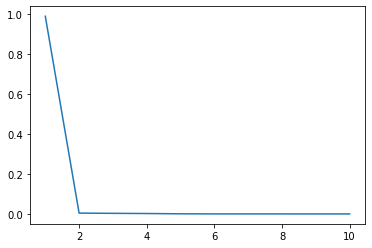

In [17]:
from sklearn.decomposition import PCA

Xtmp = data[s1 + s2] # select data without the target asset
pca = PCA(n_components=10)
pca.fit(Xtmp)

n_comp = np.arange(1,11)
plt.plot(n_comp, pca.explained_variance_ratio_)

In [18]:
pca.explained_variance_ratio_

array([9.90242245e-01, 4.06074853e-03, 2.91337962e-03, 2.00544557e-03,
       5.33359127e-04, 6.42424547e-05, 4.40217708e-05, 3.40280142e-05,
       1.77326393e-05, 1.54111682e-05])

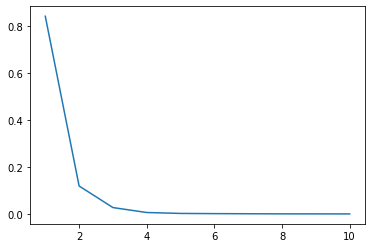

In [19]:
Xtmp1 = data[s1] # select data without the target asset
pca = PCA(n_components=10)
pca.fit(Xtmp1)

n_comp = np.arange(1,11)
plt.plot(n_comp, pca.explained_variance_ratio_)

In [20]:
pca.explained_variance_ratio_

array([8.40526719e-01, 1.18962491e-01, 2.72893359e-02, 6.26269468e-03,
       2.35255412e-03, 1.52295014e-03, 9.83019149e-04, 5.40342730e-04,
       4.16368226e-04, 2.92697466e-04])

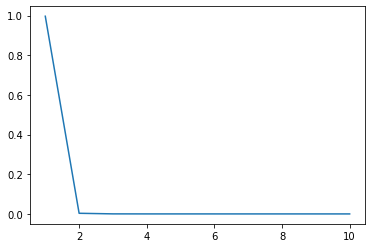

In [21]:
Xtmp2 = data[s2] # select data without the target asset
pca = PCA(n_components=10)
pca.fit(Xtmp2)

n_comp = np.arange(1,11)
plt.plot(n_comp, pca.explained_variance_ratio_)

In [22]:
pca.explained_variance_ratio_


array([9.96460975e-01, 3.19883513e-03, 2.27212732e-04, 4.19873926e-05,
       2.79344866e-05, 1.15634935e-05, 9.12538507e-06, 7.07987860e-06,
       4.18435148e-06, 2.88679701e-06])

### Step 3: Parameter Selection

In [23]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from itertools import product
from scipy import stats

def compute_votes(data, pca_comp, beta, lookback, Cs, gammas, epsilons):
    '''
    compute daily votes of the models with the given parameters
    '''
    # start with equal weights
    weights = np.ones(len(Cs)*len(gammas)*len(epsilons))
    weights = weights/sum(weights) # normalize so that weights sum to 1

    daily_votes = np.zeros(len(data.index)*2).reshape(len(data.index), 2)

    for t in range(lookback,len(data.index)-1):
        votes = np.zeros(len(weights)*2).reshape(len(weights), 2)
        index = 0
        for C,gamma,epsilon in product(Cs,gammas,epsilons):
            model1 = make_pipeline(StandardScaler(), PCA(n_components=pca_comp), 
                                  SVR(C=C, gamma=gamma, epsilon=epsilon))
            model2 = make_pipeline(StandardScaler(), PCA(n_components=pca_comp), 
                                  SVR(C=C, gamma=gamma, epsilon=epsilon))
            X_train1 = data[s1].iloc[t-lookback:t+1].values
            y_train1 = data[y1].iloc[t-lookback:t+1].values.flatten()
            X_train2 = data[s2].iloc[t-lookback:t+1].values
            y_train2 = data[y2].iloc[t-lookback:t+1].values.flatten()
            model1.fit(X_train1,y_train1)
            model2.fit(X_train2,y_train2)
            X_test1 = data[s1].iloc[t].values.reshape(1,-1)
            X_test2 = data[s2].iloc[t].values.reshape(1,-1)
            yhat1 = model1.predict(X_test1)
            yhat2 = model2.predict(X_test2)
            hedge_ratio = stats.linregress(y_train1, y_train2).slope
            
            if np.abs(hedge_ratio*data[y2].iloc[t].values.flatten() - data[y1].iloc[t].values.flatten()) >= np.abs(hedge_ratio*yhat2 - yhat1):
                if hedge_ratio*data[y2].iloc[t].values.flatten() > data[y1].iloc[t].values.flatten():
                    votes[index] = np.array([1., -hedge_ratio])
                    
                else:
                    votes[index] = np.array([-1., hedge_ratio])
                    
            index += 1

        final_vote = np.dot(weights,votes)
        final_vote[0], final_vote[1] = round(final_vote[0], 4), round(final_vote[1], 4)

        # update weights based on true direction
        if np.abs(hedge_ratio*data[y2].iloc[t+1].values.flatten() - data[y1].iloc[t+1].values.flatten()) >\
        np.abs(hedge_ratio*data[y2].iloc[t].values.flatten() - data[y1].iloc[t].values.flatten()):
            
            true_direction = np.array([0., 0.])
            
        else:
            if hedge_ratio*data[y2].iloc[t].values.flatten() > data[y1].iloc[t].values.flatten():
                true_direction = np.array([1., -hedge_ratio])
                
            else:
                true_direction = np.array([-1., hedge_ratio])
                
        boolean_array = final_vote!=true_direction
        
        if True in boolean_array:
            incorrect_votes_ind = np.where(votes!=true_direction)[0]
            incorrect_votes_ind = np.array(list(set(incorrect_votes_ind)))
            weights[incorrect_votes_ind] = beta * weights[incorrect_votes_ind]
            weights = weights/sum(weights)
            
        for i in range(len(final_vote)):
            if final_vote[i] < 0.3 and final_vote[i] > -0.3:
                final_vote = np.array([0., 0.])
                break
                
        final_vote[0] = np.sign(final_vote[0])
        final_vote[1] = -hedge_ratio*final_vote[0]
        daily_votes[t] = final_vote

    return daily_votes


### Step 4: Validation Testing

In [24]:
# SVR hyperparameters
Cs = set((0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000))
gammas = set((0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000))
epsilons = set((0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1))

In [25]:
# strategy parameters
betas = [0.74, 0.75, 0.76] # betas for downgrading weights
lookbacks = [20] # how many last trading days to include in model training
pca_comps = [1] # number of principal components to use

In [26]:
columns = ['Beta', 'Lookback', 'PCA components', 'Num wins', 'Num losses', 'Pct Win', 
           'Avg Win', 'Avg Loss', 'Total Return', 'APR', 'Sharpe', 'Correlation with traded asset RUT',
          'Correlation with traded asset SP400']
results = pd.DataFrame(columns=columns)

for pca_comp,beta,lookback in product(pca_comps,betas,lookbacks):
    daily_votes = compute_votes(data, pca_comp=pca_comp, beta=beta, lookback=lookback, 
                                Cs=Cs, gammas=gammas, epsilons=epsilons)
    datatmp = data[['RUT', 'SP400']].iloc[lookback+50:].copy() # skip first 50 days
    datatmp['RUT_returns'] = datatmp['RUT'].pct_change()
    datatmp['SP400_returns'] = datatmp['SP400'].pct_change()
    votes_decision = pd.DataFrame(daily_votes[lookback+50:], columns = ['RUT_vote', 'SP400_vote'], index = datatmp.index)
    votes_decision = votes_decision.shift()
    datatmp['alg_returns'] = datatmp['RUT_returns']*votes_decision['RUT_vote'] + datatmp['SP400_returns']*votes_decision['SP400_vote']
    datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
    
    datatmp.dropna(inplace=True)
    votes_decision.dropna(inplace=True)
    
    num_wins = (np.sign(datatmp[['RUT_returns', 'SP400_returns']].values) == np.sign(votes_decision.values)).sum()
    num_losses = (np.sign(datatmp[['RUT_returns', 'SP400_returns']].values) != np.sign(votes_decision.values)).sum()
    pct_win = num_wins / (num_wins + num_losses)
    avg_win = (abs(datatmp[np.sign(datatmp[['RUT_returns', 'SP400_returns']]) == np.sign(votes_decision.values)][['RUT_returns', 'SP400_returns']]).sum(axis = 0)).sum()/num_wins
    avg_loss = (abs(datatmp[np.sign(datatmp[['RUT_returns', 'SP400_returns']]) != np.sign(votes_decision.values)][['RUT_returns', 'SP400_returns']]).sum(axis = 0)).sum()/num_losses
    total_return = (datatmp['alg_cumret'][-1] - datatmp['alg_cumret'][0]) / datatmp['alg_cumret'][0]
    apr = (1+total_return)**(252/len(datatmp.index)) - 1
    sharpe = np.sqrt(252)*datatmp['alg_returns'].mean() / datatmp['alg_returns'].std()
    corrcoef1 = np.corrcoef(datatmp['RUT_returns'], datatmp['alg_returns'])[0,1]
    corrcoef2 = np.corrcoef(datatmp['SP400_returns'], datatmp['alg_returns'])[0,1]
    
    results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp, 
                              'Num wins':num_wins, 'Num losses':num_losses, 'Pct Win':pct_win, 
                              'Avg Win':avg_win, 'Avg Loss':avg_loss, 'Total Return':total_return, 
                              'APR':apr, 'Sharpe':sharpe, 'Correlation with traded asset RUT':corrcoef1,
                             'Correlation with traded asset SP400': corrcoef2}, 
                              ignore_index=True)
    

<ipython-input-26-f9268bd0fa8d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp,
<ipython-input-26-f9268bd0fa8d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp,
<ipython-input-26-f9268bd0fa8d>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Beta':beta, 'Lookback':lookback, 'PCA components':pca_comp,


In [27]:
results

,Beta,Lookback,PCA components,Num wins,Num losses,Pct Win,Avg Win,Avg Loss,Total Return,APR,Sharpe,Correlation with traded asset RUT,Correlation with traded asset SP400
0,0.74,20.0,1.0,241.0,577.0,0.294621,0.012380,0.011556,-0.006372,-0.003931,0.016853,-0.054362,-0.117606
1,0.75,20.0,1.0,242.0,576.0,0.295844,0.012385,0.011553,0.004366,0.002688,0.129342,-0.049038,-0.111033
2,0.76,20.0,1.0,244.0,574.0,0.298289,0.012330,0.011573,-0.004551,-0.002807,0.035961,-0.051228,-0.112951


### Step 5: Visual Performance: BackTest

In [30]:
# Choose beta = 0.1, lookbcak = 20, and PCA components = 2 for buying and hold strategy
daily_votes = compute_votes(data, pca_comp=1, beta=0.75, lookback=20, 
                            Cs=Cs, gammas=gammas, epsilons=epsilons)
    
datatmp = data[['RUT', 'SP400']].iloc[lookback+50:].copy() # skip first 50 days
datatmp['RUT_returns'] = datatmp['RUT'].pct_change()
datatmp['SP400_returns'] = datatmp['SP400'].pct_change()
votes_decision = pd.DataFrame(daily_votes[lookback+50:], columns = ['RUT_vote', 'SP400_vote'], index = datatmp.index)
votes_decision = np.sign(votes_decision.shift())
datatmp['alg_returns'] = datatmp['RUT_returns']*votes_decision['RUT_vote'] + datatmp['SP400_returns']*votes_decision['SP400_vote']
datatmp['alg_cumret'] = np.cumprod(datatmp['alg_returns']+1)
datatmp.dropna(inplace=True)

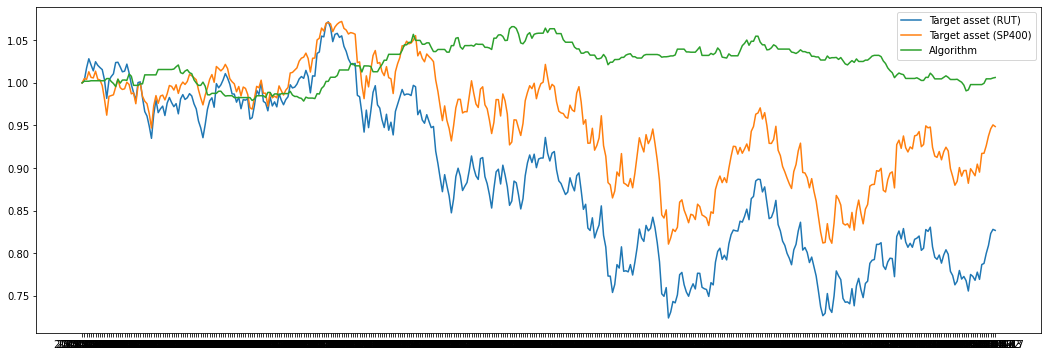

In [31]:
plt.figure(figsize=(18,6))
plt.plot(datatmp[['RUT']]/datatmp[['RUT']].iloc[0], label='Target asset (RUT)')
plt.plot(datatmp[['SP400']]/datatmp[['SP400']].iloc[0], label='Target asset (SP400)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

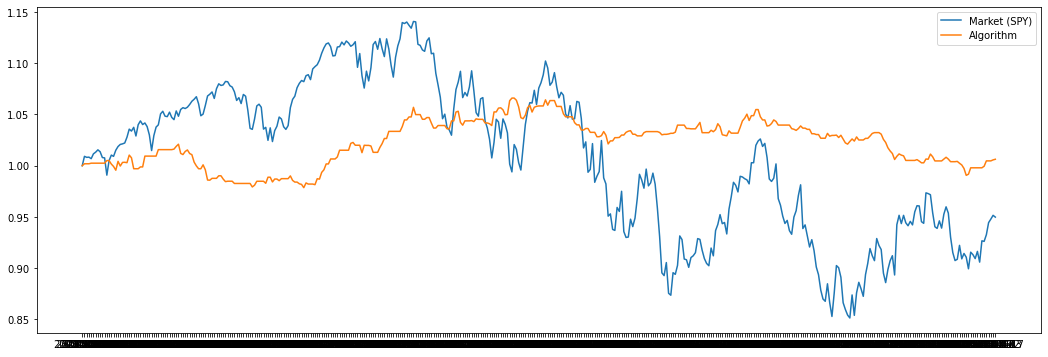

In [32]:
# Comparison with the market
datatmp['SPY'] = data.loc[datatmp.index, ['SPY']]

plt.figure(figsize=(18,6))
plt.plot(datatmp[['SPY']]/datatmp[['SPY']].iloc[0], label='Market (SPY)')
plt.plot(datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0], label='Algorithm')
plt.legend()

### Step 6: Correlation Check

In [29]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(252/len(cumret)) - 1
    sharpe = np.sqrt(252) * np.nanmean(cumret.pct_change()) / np.nanstd(cumret.pct_change())
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

In [33]:
metrics = pd.DataFrame(columns=['Total Return', 'APR', 'Sharpe', 'MaxDrawdown', 'MaxDrawdownDuration'], 
                       index=['RUT', 'SP400', 'SPY', 'Algo'])

metrics.loc['RUT',:] = calculate_metrics(datatmp['RUT'])
metrics.loc['SP400',:] = calculate_metrics(datatmp['SP400'])
metrics.loc['SPY',:] = calculate_metrics(datatmp['SPY'])
metrics.loc['Algo',:] = calculate_metrics(datatmp['alg_cumret'])

metrics

,Total Return,APR,Sharpe,MaxDrawdown,MaxDrawdownDuration
RUT,-0.173285,-0.110635,-0.339741,-0.324595,298.0
SP400,-0.051327,-0.031943,-0.030376,-0.24391,292.0
SPY,-0.050147,-0.031202,-0.051656,-0.253606,260.0
Algo,0.006292,0.003872,0.101442,-0.070729,215.0


In [34]:
datatmp[['RUT', 'SP400', 'SPY', 'alg_cumret']].pct_change().corr()

,RUT,SP400,SPY,alg_cumret
RUT,1.000000,0.967868,0.890071,0.247563
SP400,0.967868,1.000000,0.923073,0.179160
SPY,0.890071,0.923073,1.000000,0.198597
alg_cumret,0.247563,0.179160,0.198597,1.000000


In [52]:
datatmp['RUT_cumret'] = datatmp[['RUT']]/datatmp[['RUT']].iloc[0]
datatmp['SP400_cumret'] = datatmp[['SP400']]/datatmp[['SP400']].iloc[0]

In [55]:
datatmp = datatmp.rename(columns = {'alg_cumret': 'SVM'})

<AxesSubplot: title={'center': 'Cumulative Return'}, xlabel='Date'>

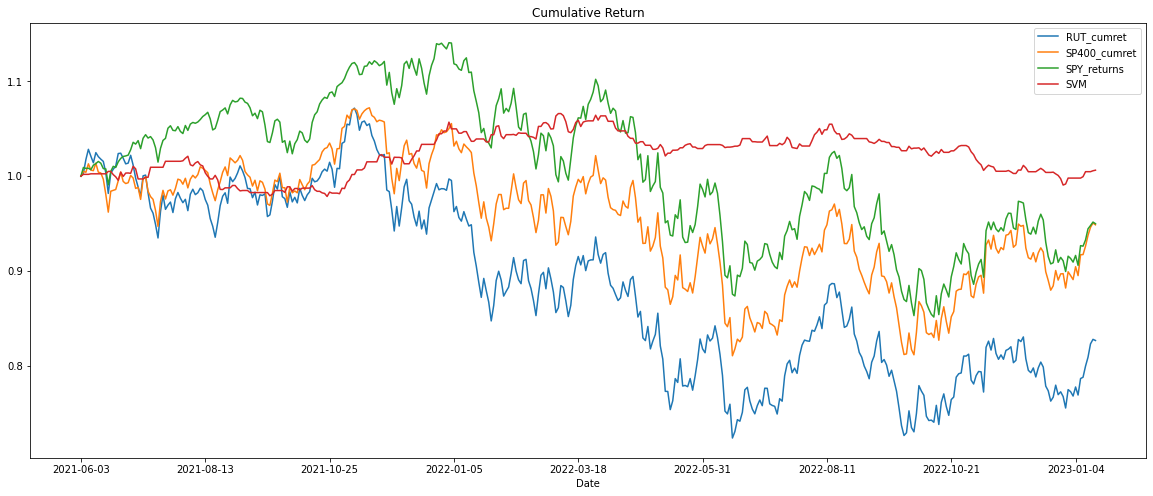

In [57]:
datatmp[['RUT_cumret', 'SP400_cumret', 'SPY_returns', 'SVM']].dropna().plot(figsize=(20,8), title = 'Cumulative Return')


In [48]:
datatmp['SPY_returns'] = datatmp[['SPY']]/datatmp[['SPY']].iloc[0]

In [50]:
datatmp['alg_cumret'] = datatmp[['alg_cumret']]/datatmp[['alg_cumret']].iloc[0]

<AxesSubplot: xlabel='Date'>

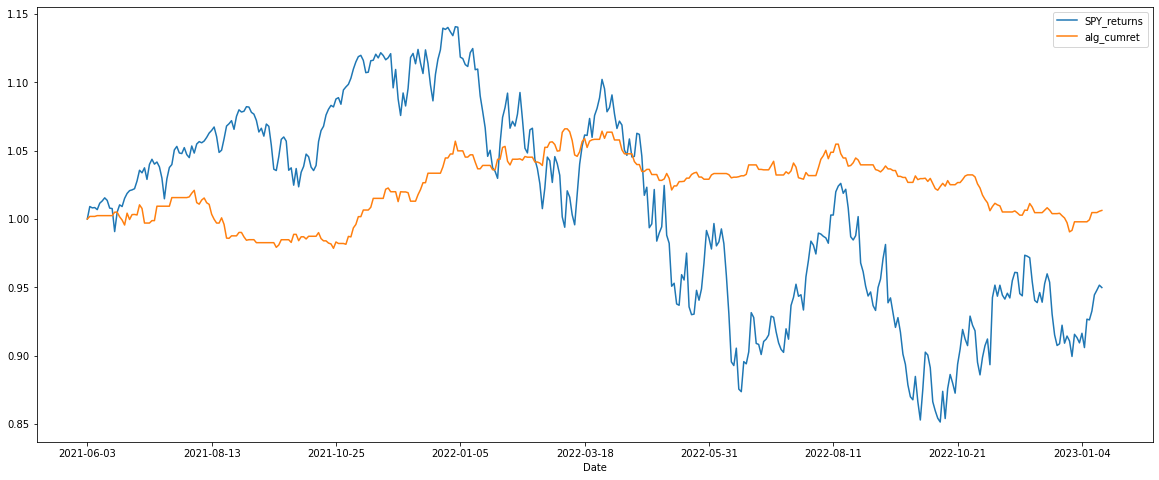

In [51]:
datatmp[['SPY_returns','alg_cumret']].dropna().plot(figsize=(20,8))